Creating sample dataset...
CSV file 'data.csv' created successfully!

COMPREHENSIVE DATA PROFILING REPORT
TASK 1: BASIC DATA PROFILING
Dataset Shape: (7, 5)
Total Rows: 7
Total Columns: 5
Memory Usage: 0.00 MB

Column Information:
----------------------------------------
Name: object
Age: float64
Gender: object
Grade: object
Email: object

Data Types Summary:
----------------------------------------
object: 4 columns
float64: 1 columns

First 5 rows:
----------------------------------------
      Name   Age  Gender Grade                Email
0    Alice  25.0  Female     A    alice@example.com
1      Bob  30.0    Male     B      bob@example.com
2  Charlie  22.0    Male     A  charlie@example.com
3    Diana  28.0  Female     C    diana@example.com
4      Eve   NaN  Female     B      eve@example.com

TASK 2: MISSING VALUES ANALYSIS
Missing Values Summary:
--------------------------------------------------------------------------------
Column  Missing_Count  Missing_Percentage  Non_Missing

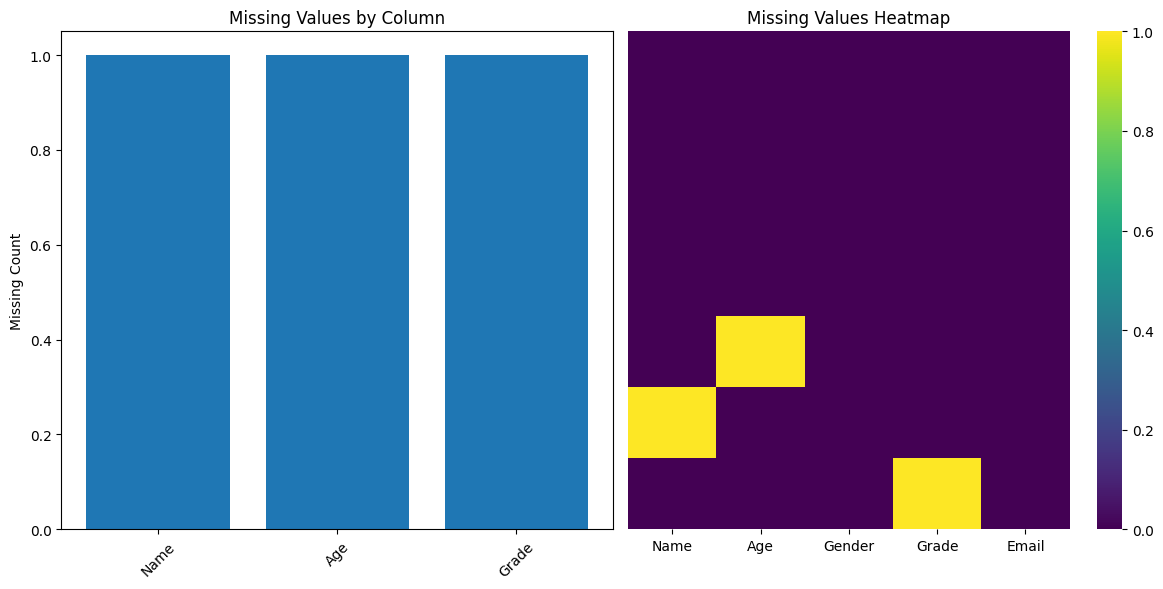


TASK 3: DATA TYPES ANALYSIS
Detailed Data Type Analysis:
----------------------------------------------------------------------------------------------------

Column: Name
  Pandas dtype: object
  Inferred type: string
  Unique values: 6
  Sample values: ['Alice', 'Bob', 'Charlie']
  Could be numeric: False
  Could be datetime: False

Column: Age
  Pandas dtype: float64
  Inferred type: floating
  Unique values: 6
  Sample values: [25.0, 30.0, 22.0]

Column: Gender
  Pandas dtype: object
  Inferred type: string
  Unique values: 2
  Sample values: ['Female', 'Male', 'Male']
  Could be numeric: False
  Could be datetime: False

Column: Grade
  Pandas dtype: object
  Inferred type: string
  Unique values: 3
  Sample values: ['A', 'B', 'A']
  Could be numeric: False
  Could be datetime: False

Column: Email
  Pandas dtype: object
  Inferred type: string
  Unique values: 7
  Sample values: ['alice@example.com', 'bob@example.com', 'charlie@example.com']
  Could be numeric: False
  Could be 

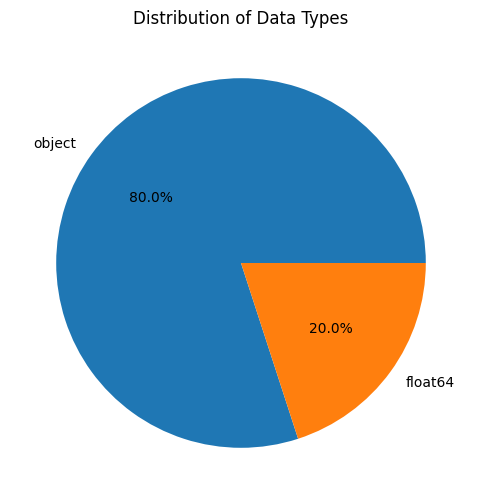


TASK 4: UNIQUE VALUES AND DUPLICATES ANALYSIS
Row-level Duplicate Analysis:
----------------------------------------
Total rows: 7
Duplicate rows: 0
Unique rows: 7
Duplicate percentage: 0.00%

Column-level Uniqueness Analysis:
--------------------------------------------------------------------------------
Column          Total    Unique   Duplicates   Uniqueness%  Most Frequent
--------------------------------------------------------------------------------
Name            6        6        0            100.00     % Alice (1x)
Age             6        6        0            100.00     % 25.0 (1x)
Gender          7        2        5            28.57      % Female (4x)
Grade           6        3        3            50.00      % A (3x)
Email           7        7        0            100.00     % alice@example.com (1x)


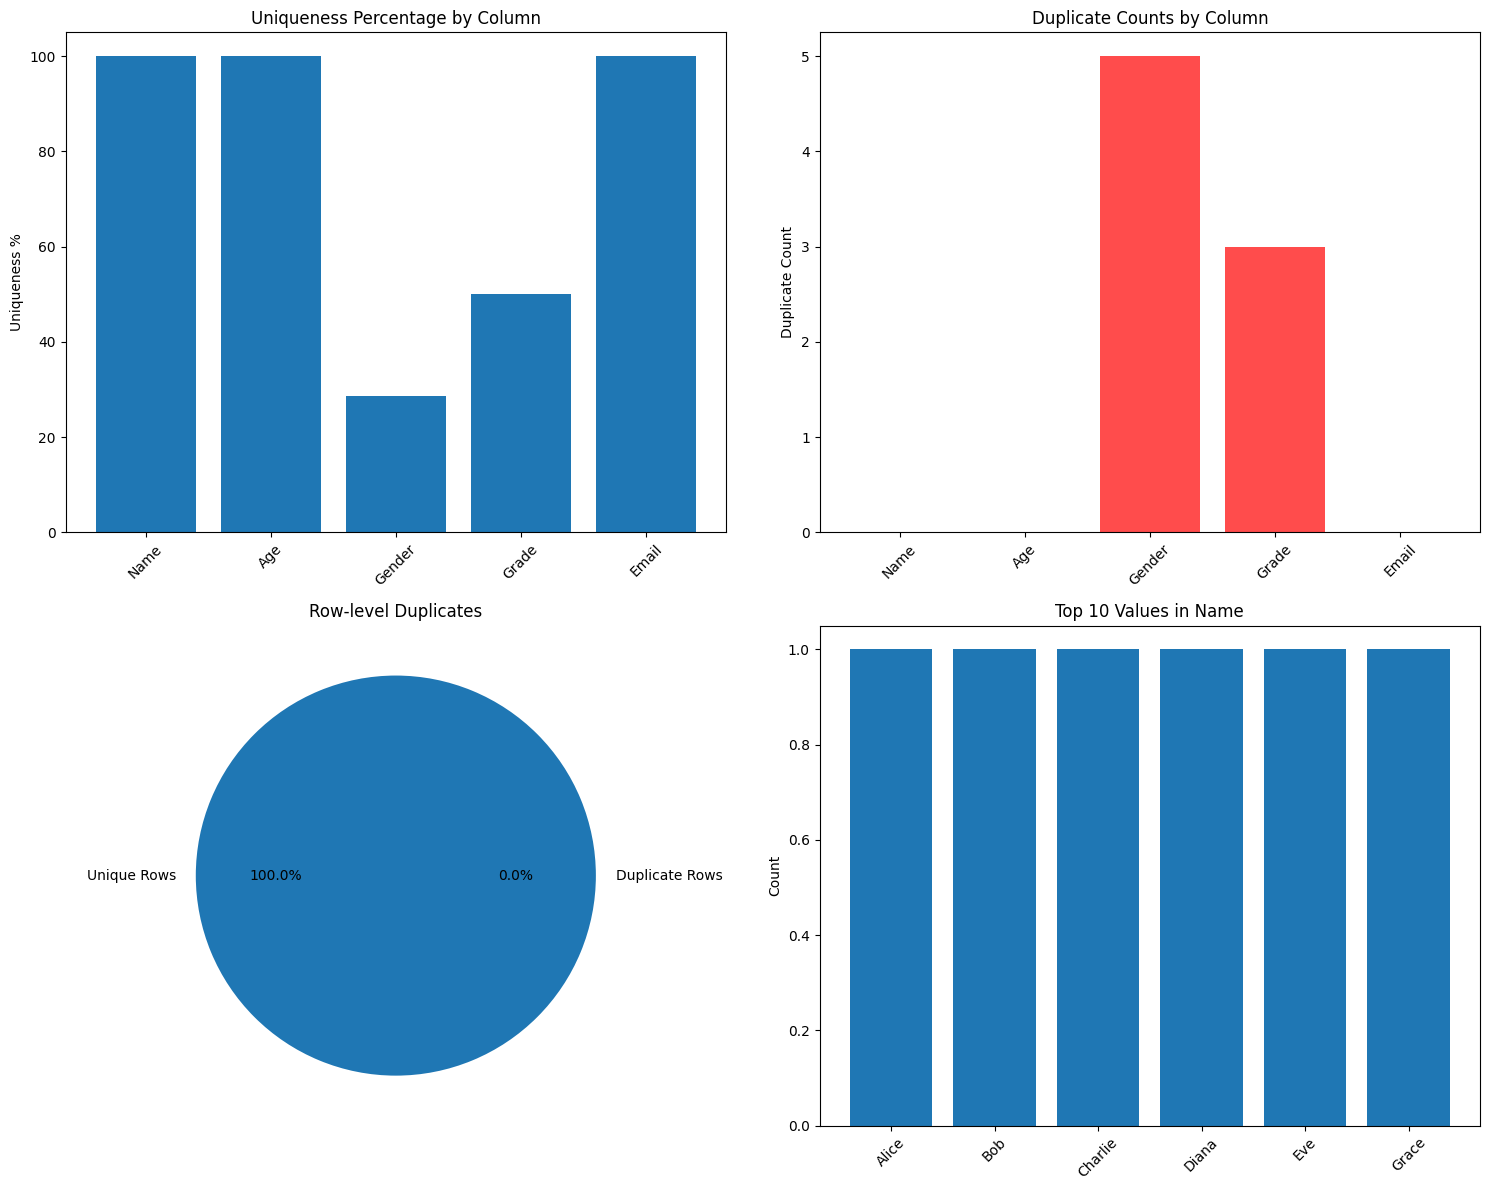


Advanced Duplicate Analysis:
----------------------------------------
No duplicate rows found.

ADDITIONAL: STATISTICAL SUMMARY
Descriptive Statistics for Numeric Columns:
--------------------------------------------------------------------------------
             Age
count   6.000000
mean   27.833333
std     4.445972
min    22.000000
25%    25.500000
50%    27.500000
75%    29.500000
max    35.000000

Additional Statistics:
----------------------------------------

Age:
  Skewness: 0.3900
  Kurtosis: -0.6150
  Coefficient of Variation: 0.1597


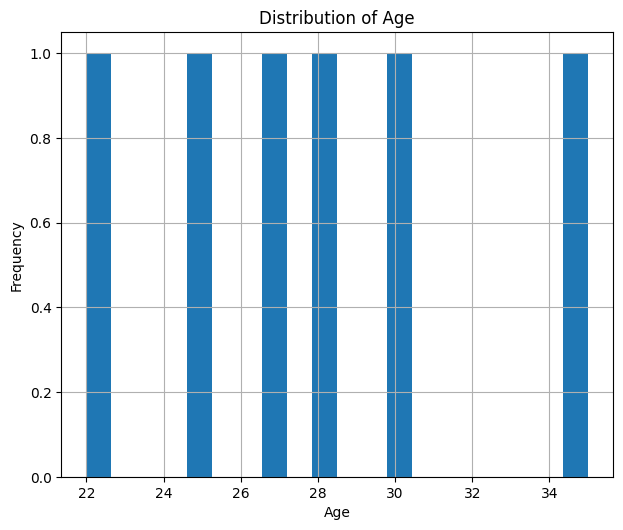


REPORT COMPLETED

EXAMPLE: Using with Different Dataset

Profiler Usage Complete!
You can now use this script with any CSV file by replacing the sample data creation with:
df = pd.read_csv('your_file.csv')
profiler = DataProfiler(df)
results = profiler.generate_full_report()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

class DataProfiler:
    def __init__(self, df):
        self.df = df
        self.profile_results = {}
        
    def basic_info(self):
        """Task 1: Basic Data Profiling"""
        print("=" * 60)
        print("TASK 1: BASIC DATA PROFILING")
        print("=" * 60)
        
        # Basic information
        print(f"Dataset Shape: {self.df.shape}")
        print(f"Total Rows: {len(self.df)}")
        print(f"Total Columns: {len(self.df.columns)}")
        print(f"Memory Usage: {self.df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Column information
        print("\nColumn Information:")
        print("-" * 40)
        for col in self.df.columns:
            print(f"{col}: {self.df[col].dtype}")
        
        # Data types summary
        dtype_counts = self.df.dtypes.value_counts()
        print(f"\nData Types Summary:")
        print("-" * 40)
        for dtype, count in dtype_counts.items():
            print(f"{dtype}: {count} columns")
        
        # Store results
        self.profile_results['basic_info'] = {
            'shape': self.df.shape,
            'total_rows': len(self.df),
            'total_columns': len(self.df.columns),
            'memory_usage_mb': self.df.memory_usage(deep=True).sum() / 1024**2,
            'dtypes': dict(self.df.dtypes),
            'dtype_counts': dict(dtype_counts)
        }
        
        # Display first few rows
        print(f"\nFirst 5 rows:")
        print("-" * 40)
        print(self.df.head())
        
        return self.profile_results['basic_info']
    
    def analyze_missing_values(self):
        """Task 2: Understanding Missing Values"""
        print("\n" + "=" * 60)
        print("TASK 2: MISSING VALUES ANALYSIS")
        print("=" * 60)
        
        # Calculate missing values
        missing_data = pd.DataFrame({
            'Column': self.df.columns,
            'Missing_Count': self.df.isnull().sum(),
            'Missing_Percentage': (self.df.isnull().sum() / len(self.df)) * 100,
            'Non_Missing_Count': self.df.notnull().sum(),
            'Data_Type': self.df.dtypes
        })
        
        # Sort by missing percentage
        missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
        
        print("Missing Values Summary:")
        print("-" * 80)
        print(missing_data.to_string(index=False))
        
        # Total missing values
        total_missing = self.df.isnull().sum().sum()
        total_cells = self.df.shape[0] * self.df.shape[1]
        print(f"\nOverall Missing Data Statistics:")
        print(f"Total missing values: {total_missing}")
        print(f"Total cells: {total_cells}")
        print(f"Overall missing percentage: {(total_missing/total_cells)*100:.2f}%")
        
        # Visualization
        plt.figure(figsize=(12, 6))
        
        # Missing values by column
        plt.subplot(1, 2, 1)
        missing_counts = self.df.isnull().sum().sort_values(ascending=False)
        missing_counts = missing_counts[missing_counts > 0]
        
        if len(missing_counts) > 0:
            plt.bar(range(len(missing_counts)), missing_counts.values)
            plt.xticks(range(len(missing_counts)), missing_counts.index, rotation=45)
            plt.ylabel('Missing Count')
            plt.title('Missing Values by Column')
            plt.tight_layout()
        else:
            plt.text(0.5, 0.5, 'No Missing Values', ha='center', va='center')
            plt.title('Missing Values by Column')
        
        # Missing values heatmap
        plt.subplot(1, 2, 2)
        if self.df.isnull().sum().sum() > 0:
            sns.heatmap(self.df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
            plt.title('Missing Values Heatmap')
        else:
            plt.text(0.5, 0.5, 'No Missing Values', ha='center', va='center')
            plt.title('Missing Values Heatmap')
        
        plt.tight_layout()
        plt.show()
        
        # Store results
        self.profile_results['missing_values'] = {
            'missing_summary': missing_data.to_dict('records'),
            'total_missing': total_missing,
            'total_cells': total_cells,
            'overall_missing_percentage': (total_missing/total_cells)*100
        }
        
        return missing_data
    
    def analyze_data_types(self):
        """Task 3: Analyze Data Types"""
        print("\n" + "=" * 60)
        print("TASK 3: DATA TYPES ANALYSIS")
        print("=" * 60)
        
        # Detailed data type analysis
        type_analysis = {}
        
        for col in self.df.columns:
            col_data = self.df[col].dropna()
            
            analysis = {
                'column_name': col,
                'pandas_dtype': str(self.df[col].dtype),
                'inferred_type': pd.api.types.infer_dtype(col_data),
                'python_type': str(type(col_data.iloc[0])) if len(col_data) > 0 else 'N/A',
                'unique_values': col_data.nunique(),
                'sample_values': list(col_data.head(3).values) if len(col_data) > 0 else []
            }
            
            # Additional checks for different data types
            if self.df[col].dtype == 'object':
                # Check if it could be numeric
                try:
                    pd.to_numeric(col_data)
                    analysis['could_be_numeric'] = True
                except:
                    analysis['could_be_numeric'] = False
                
                # Check if it could be datetime
                try:
                    pd.to_datetime(col_data)
                    analysis['could_be_datetime'] = True
                except:
                    analysis['could_be_datetime'] = False
            
            type_analysis[col] = analysis
        
        # Display results
        print("Detailed Data Type Analysis:")
        print("-" * 100)
        for col, analysis in type_analysis.items():
            print(f"\nColumn: {col}")
            print(f"  Pandas dtype: {analysis['pandas_dtype']}")
            print(f"  Inferred type: {analysis['inferred_type']}")
            print(f"  Unique values: {analysis['unique_values']}")
            print(f"  Sample values: {analysis['sample_values']}")
            
            if 'could_be_numeric' in analysis:
                print(f"  Could be numeric: {analysis['could_be_numeric']}")
            if 'could_be_datetime' in analysis:
                print(f"  Could be datetime: {analysis['could_be_datetime']}")
        
        # Data type distribution visualization
        plt.figure(figsize=(10, 6))
        dtype_counts = self.df.dtypes.value_counts()
        plt.pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%')
        plt.title('Distribution of Data Types')
        plt.show()
        
        # Store results
        self.profile_results['data_types'] = type_analysis
        
        return type_analysis
    
    def detect_unique_and_duplicates(self):
        """Task 4: Detect Unique Values and Duplicates"""
        print("\n" + "=" * 60)
        print("TASK 4: UNIQUE VALUES AND DUPLICATES ANALYSIS")
        print("=" * 60)
        
        # Row-level duplicates
        duplicate_rows = self.df.duplicated().sum()
        total_rows = len(self.df)
        
        print("Row-level Duplicate Analysis:")
        print("-" * 40)
        print(f"Total rows: {total_rows}")
        print(f"Duplicate rows: {duplicate_rows}")
        print(f"Unique rows: {total_rows - duplicate_rows}")
        print(f"Duplicate percentage: {(duplicate_rows/total_rows)*100:.2f}%")
        
        # Column-level uniqueness analysis
        uniqueness_analysis = {}
        
        print("\nColumn-level Uniqueness Analysis:")
        print("-" * 80)
        print(f"{'Column':<15} {'Total':<8} {'Unique':<8} {'Duplicates':<12} {'Uniqueness%':<12} {'Most Frequent'}")
        print("-" * 80)
        
        for col in self.df.columns:
            col_data = self.df[col].dropna()
            total_count = len(col_data)
            unique_count = col_data.nunique()
            duplicate_count = total_count - unique_count
            uniqueness_pct = (unique_count / total_count * 100) if total_count > 0 else 0
            
            # Most frequent value
            if total_count > 0:
                value_counts = col_data.value_counts()
                most_frequent = f"{value_counts.index[0]} ({value_counts.iloc[0]}x)"
            else:
                most_frequent = "N/A"
            
            print(f"{col:<15} {total_count:<8} {unique_count:<8} {duplicate_count:<12} {uniqueness_pct:<11.2f}% {most_frequent}")
            
            uniqueness_analysis[col] = {
                'total_count': total_count,
                'unique_count': unique_count,
                'duplicate_count': duplicate_count,
                'uniqueness_percentage': uniqueness_pct,
                'most_frequent_value': value_counts.index[0] if total_count > 0 else None,
                'most_frequent_count': value_counts.iloc[0] if total_count > 0 else 0,
                'value_counts': dict(value_counts.head(5)) if total_count > 0 else {}
            }
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Uniqueness by column
        cols = list(uniqueness_analysis.keys())
        uniqueness_pcts = [uniqueness_analysis[col]['uniqueness_percentage'] for col in cols]
        
        axes[0, 0].bar(cols, uniqueness_pcts)
        axes[0, 0].set_title('Uniqueness Percentage by Column')
        axes[0, 0].set_ylabel('Uniqueness %')
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # Duplicate counts by column
        duplicate_counts = [uniqueness_analysis[col]['duplicate_count'] for col in cols]
        axes[0, 1].bar(cols, duplicate_counts, color='red', alpha=0.7)
        axes[0, 1].set_title('Duplicate Counts by Column')
        axes[0, 1].set_ylabel('Duplicate Count')
        axes[0, 1].tick_params(axis='x', rotation=45)
        
        # Row duplicates pie chart
        row_duplicate_data = ['Unique Rows', 'Duplicate Rows']
        row_duplicate_counts = [total_rows - duplicate_rows, duplicate_rows]
        axes[1, 0].pie(row_duplicate_counts, labels=row_duplicate_data, autopct='%1.1f%%')
        axes[1, 0].set_title('Row-level Duplicates')
        
        # Value counts for categorical columns
        categorical_cols = [col for col in self.df.columns if self.df[col].dtype == 'object']
        if categorical_cols:
            col_to_plot = categorical_cols[0]
            value_counts = self.df[col_to_plot].value_counts().head(10)
            axes[1, 1].bar(range(len(value_counts)), value_counts.values)
            axes[1, 1].set_xticks(range(len(value_counts)))
            axes[1, 1].set_xticklabels(value_counts.index, rotation=45)
            axes[1, 1].set_title(f'Top 10 Values in {col_to_plot}')
            axes[1, 1].set_ylabel('Count')
        else:
            axes[1, 1].text(0.5, 0.5, 'No categorical columns', ha='center', va='center')
            axes[1, 1].set_title('Categorical Column Distribution')
        
        plt.tight_layout()
        plt.show()
        
        # Advanced duplicate analysis
        print(f"\nAdvanced Duplicate Analysis:")
        print("-" * 40)
        
        if duplicate_rows > 0:
            # Show some duplicate rows
            duplicate_mask = self.df.duplicated(keep=False)
            duplicate_data = self.df[duplicate_mask].sort_values(list(self.df.columns))
            print(f"Sample of duplicate rows:")
            print(duplicate_data.head(10))
            
            # Find completely identical rows
            completely_identical = self.df[self.df.duplicated(keep=False)]
            print(f"\nCompletely identical rows: {len(completely_identical)}")
        else:
            print("No duplicate rows found.")
        
        # Store results
        self.profile_results['unique_duplicates'] = {
            'row_duplicates': duplicate_rows,
            'total_rows': total_rows,
            'row_duplicate_percentage': (duplicate_rows/total_rows)*100,
            'column_analysis': uniqueness_analysis
        }
        
        return uniqueness_analysis
    
    def statistical_summary(self):
        """Additional: Statistical Summary for Numeric Columns"""
        print("\n" + "=" * 60)
        print("ADDITIONAL: STATISTICAL SUMMARY")
        print("=" * 60)
        
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        
        if len(numeric_cols) > 0:
            print("Descriptive Statistics for Numeric Columns:")
            print("-" * 80)
            
            # Basic statistics
            desc_stats = self.df[numeric_cols].describe()
            print(desc_stats)
            
            # Additional statistics
            print(f"\nAdditional Statistics:")
            print("-" * 40)
            for col in numeric_cols:
                col_data = self.df[col].dropna()
                if len(col_data) > 0:
                    print(f"\n{col}:")
                    print(f"  Skewness: {stats.skew(col_data):.4f}")
                    print(f"  Kurtosis: {stats.kurtosis(col_data):.4f}")
                    print(f"  Coefficient of Variation: {col_data.std()/col_data.mean():.4f}")
            
            # Correlation matrix
            if len(numeric_cols) > 1:
                plt.figure(figsize=(10, 8))
                correlation_matrix = self.df[numeric_cols].corr()
                sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
                plt.title('Correlation Matrix of Numeric Variables')
                plt.tight_layout()
                plt.show()
            
            # Distribution plots
            if len(numeric_cols) <= 4:
                fig, axes = plt.subplots(2, 2, figsize=(12, 10))
                axes = axes.ravel()
                
                for i, col in enumerate(numeric_cols):
                    if i < 4:
                        self.df[col].hist(bins=20, ax=axes[i])
                        axes[i].set_title(f'Distribution of {col}')
                        axes[i].set_xlabel(col)
                        axes[i].set_ylabel('Frequency')
                
                # Hide unused subplots
                for i in range(len(numeric_cols), 4):
                    axes[i].set_visible(False)
                
                plt.tight_layout()
                plt.show()
        else:
            print("No numeric columns found in the dataset.")
    
    def generate_full_report(self):
        """Generate a comprehensive data profiling report"""
        print("COMPREHENSIVE DATA PROFILING REPORT")
        print("=" * 100)
        
        # Run all profiling tasks
        self.basic_info()
        self.analyze_missing_values()
        self.analyze_data_types()
        self.detect_unique_and_duplicates()
        self.statistical_summary()
        
        print("\n" + "=" * 100)
        print("REPORT COMPLETED")
        print("=" * 100)
        
        return self.profile_results

# Create sample data (as from the original file)
print("Creating sample dataset...")
data = {
    "Name": ["Alice", "Bob", "Charlie", "Diana", "Eve", None, "Grace"],
    "Age": [25, 30, 22, 28, None, 35, 27],
    "Gender": ["Female", "Male", "Male", "Female", "Female", "Male", "Female"],
    "Grade": ["A", "B", "A", "C", "B", "A", None],
    "Email": ["alice@example.com", "bob@example.com", "charlie@example.com", 
              "diana@example.com", "eve@example.com", "frank@example.com", "grace@example.com"]
}

df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)
print("CSV file 'data.csv' created successfully!\n")

# Load the CSV file
df = pd.read_csv('data.csv')

# Create profiler instance and generate full report
profiler = DataProfiler(df)
results = profiler.generate_full_report()

# Example of using the profiler with different datasets
print("\n" + "="*100)
print("EXAMPLE: Using with Different Dataset")
print("="*100)

# You can also load your own CSV file like this:
# df_custom = pd.read_csv('your_file.csv')
# profiler_custom = DataProfiler(df_custom)
# results_custom = profiler_custom.generate_full_report()

print("\nProfiler Usage Complete!")
print("You can now use this script with any CSV file by replacing the sample data creation with:")
print("df = pd.read_csv('your_file.csv')")
print("profiler = DataProfiler(df)")
print("results = profiler.generate_full_report()")